In [3]:
import osmnx as ox
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import box

# Define the area of interest (bounding box)
north, south, east, west = 5.6145, 5.6037, -0.1870, -0.2057


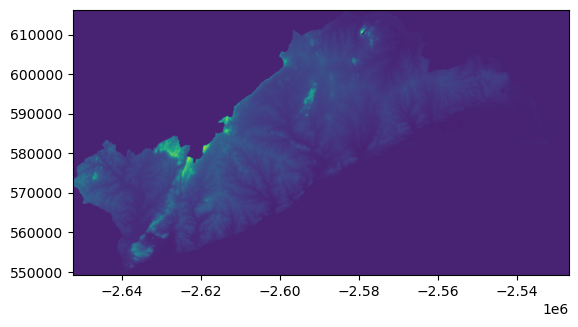

<Axes: >

In [4]:
# Step 1: Load the .tif file (Elevation Data)
elevation_data = rasterio.open('../data/DEM.tif')

# Visualise the elevation data to understand its structure
show(elevation_data)

In [5]:
# Step 2: Load the .geojson file (Building Data or other Geospatial Features)
building_data = gpd.read_file('../data/G.Accra.geojson')

# Display the first few rows to inspect the data
print(building_data.head())

  COUNTRY         NAME_1 VARNAME_1  TYPE_1  ISO_1  Unique_ID  \
0   Ghana  Greater Accra        NA  Region  GH-AA         14   

                                            geometry  
0  MULTIPOLYGON (((-0.22106 5.52982, -0.22130 5.5...  


In [2]:
# # Download buildings data
# buildings = ox.geometries_from_bbox(north, south, east, west, tags={'building': True})

# # Display the first few rows of the buildings data
# buildings.head()

/var/folders/g1/_5ywfh994dvfccvkj4cn_wy00000gp/T/ipykernel_8481/2963203368.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_bbox(north, south, east, west, tags={'building': True})
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/osmnx/geometries.py:48: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  return features.features_from_bbox(north, south, east, west, tags=tags)
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/osmnx/geometr

addr:city addr:street  \
element_type osmid                             
way          103189892       NaN         NaN   
             187123430       NaN         NaN   
             187123432       NaN         NaN   
             187123433       NaN         NaN   
             187123434       NaN         NaN   

                                                                 geometry  \
element_type osmid                                                          
way          103189892  POLYGON ((-0.18690 5.60657, -0.18680 5.60651, ...   
             187123430  POLYGON ((-0.19032 5.60543, -0.19026 5.60545, ...   
             187123432  POLYGON ((-0.19015 5.60471, -0.19009 5.60472, ...   
             187123433  POLYGON ((-0.19024 5.60509, -0.19018 5.60510, ...   
             187123434  POLYGON ((-0.18999 5.60401, -0.18992 5.60403, ...   

                                                                    nodes  \
element_type osmid                                                          
way          103189892  [1191436250, 1191436252, 1191436152, 119143618...   
             187123430  [1978710357, 1978710359, 1978710364, 197871035...   
             187123432  [1978710374, 1978710358, 1978710352, 197871037...   
             187123433  [1978710363, 1978710361, 1978710372, 197871036...   
             187123434  [1978710369, 1978710351, 1978710355, 197871037...   

                       building source name amenity building:levels layer  \
element_type osmid                                                          
way          103189892      yes    NaN  NaN     NaN             NaN   NaN   
             187123430      yes   Bing  NaN     NaN             NaN   NaN   
             187123432      yes   Bing  NaN     NaN             NaN   NaN   
             187123433      yes   Bing  NaN     NaN             NaN   NaN   
             187123434      yes   Bing  NaN     NaN             NaN   NaN   

                       shop ways type  
element_type osmid                     
way          103189892  NaN  NaN  NaN  
             187123430  NaN  NaN  NaN  
             187123432  NaN  NaN  NaN  
             187123433  NaN  NaN  NaN  
             187123434  NaN  NaN  NaN

/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


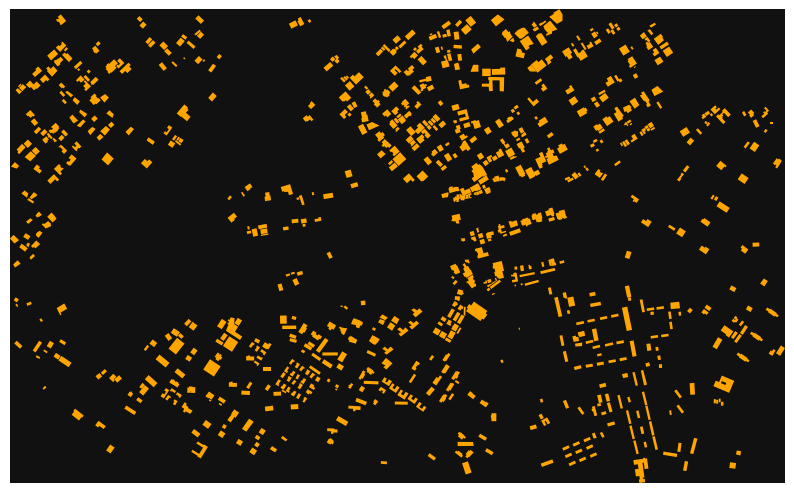

In [3]:
# # Plot the buildings
# fig, ax = ox.plot_footprints(buildings, figsize=(10, 10))
# plt.show()

In [4]:
# fixed_flight_altitude = 120  # Set fixed altitude of drone in meters

In [5]:
# # Check if the 'height' attribute exists
# if 'height' in buildings.columns:
#     # Filter out buildings below the fixed flight altitude
#     relevant_buildings = buildings[buildings['height'] > fixed_flight_altitude]
#     # Display the first few rows of the filtered buildings
#     print(relevant_buildings.head())
# else:
#     # Handle the case where 'height' attribute is missing
#     print("Building heights are not available in the dataset.")
#     relevant_buildings = pd.DataFrame()  # Define an empty DataFrame to avoid errors

# # At this point, you can decide what to do next based on whether 'relevant_buildings' has data
# if not relevant_buildings.empty:
#     # Proceed with further processing
#     print(f"Number of relevant buildings: {len(relevant_buildings)}")
# else:
#     print("No relevant buildings to process.")

Building heights are not available in the dataset.
No relevant buildings to process.


In [6]:
# latitudes = np.linspace(south, north, num=10)  # Adjust num for finer resolution
# longitudes = np.linspace(west, east, num=10)

# # Fetch elevation data for the grid of points
# def get_elevation(lat, lon):
#     response = requests.get(f'https://api.open-elevation.com/api/v1/lookup?locations={lat},{lon}')
#     if response.status_code == 200:
#         return response.json()['results'][0]['elevation']
#     else:
#         return None

# # Create a grid of coordinates
# coords = [(lat, lon) for lat in latitudes for lon in longitudes]
# elevations = [get_elevation(lat, lon) for lat, lon in coords]

# # Create a DataFrame for elevation data
# elevation_data = pd.DataFrame(coords, columns=['latitude', 'longitude'])
# elevation_data['elevation'] = elevations

# # Display the first few rows
# print(elevation_data.head())

   latitude  longitude  elevation
0    5.6037  -0.205700       19.0
1    5.6037  -0.203622       24.0
2    5.6037  -0.201544       28.0
3    5.6037  -0.199467       32.0
4    5.6037  -0.197389       34.0


In [7]:
# if not relevant_buildings.empty:
#     # Assuming you want to flag areas where elevation + building height exceeds flight altitude
#     combined_data = []

#     for _, row in elevation_data.iterrows():
#         lat, lon, elevation = row['latitude'], row['longitude'], row['elevation']
#         # Filter out any building in this location with height plus elevation greater than the flight altitude
#         for _, building in relevant_buildings.iterrows():
#             if building.geometry.contains(Point(lon, lat)):
#                 total_height = elevation + building['height']  # or 'approx_height'
#                 if total_height > fixed_flight_altitude:
#                     combined_data.append((lat, lon, total_height))

#     # Convert combined data into a DataFrame or GeoDataFrame for further processing
#     combined_df = pd.DataFrame(combined_data, columns=['latitude', 'longitude', 'total_height'])
